In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Pclass'>

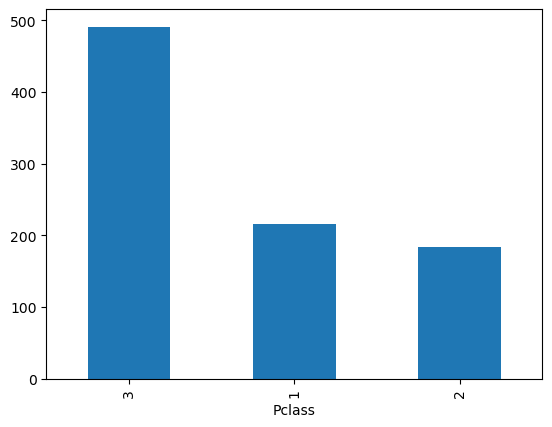

In [7]:
df_train["Pclass"].value_counts().plot(kind = "bar")

In [8]:
# female to 1 and male to 0
# C to 1 Q to 2 and S to 3
#drop the names because we have pIds
df_train = df_train.drop(["Name"], axis = 1)
df_train = df_train.drop(["Ticket"], axis = 1)
df_train = df_train.drop(["Cabin"], axis = 1)
df_train["Sex"] = df_train["Sex"].map({"female" :1,"male" :0})
df_train["Embarked"] = df_train["Embarked"].map({"C" :1,"Q" :2, "S":3})


df_test = df_test.drop(["Name"], axis = 1)
df_test = df_test.drop(["Ticket"], axis = 1)
df_test = df_test.drop(["Cabin"], axis = 1)
df_test["Sex"] = df_test["Sex"].map({"female" :1,"male" :0})
df_test["Embarked"] = df_test["Embarked"].map({"C" :1,"Q" :2, "S":3})

In [9]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,3.0
3,4,1,1,1,35.0,1,0,53.1000,3.0
4,5,0,3,0,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,3.0
887,888,1,1,1,19.0,0,0,30.0000,3.0
888,889,0,3,1,NaN,1,2,23.4500,3.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


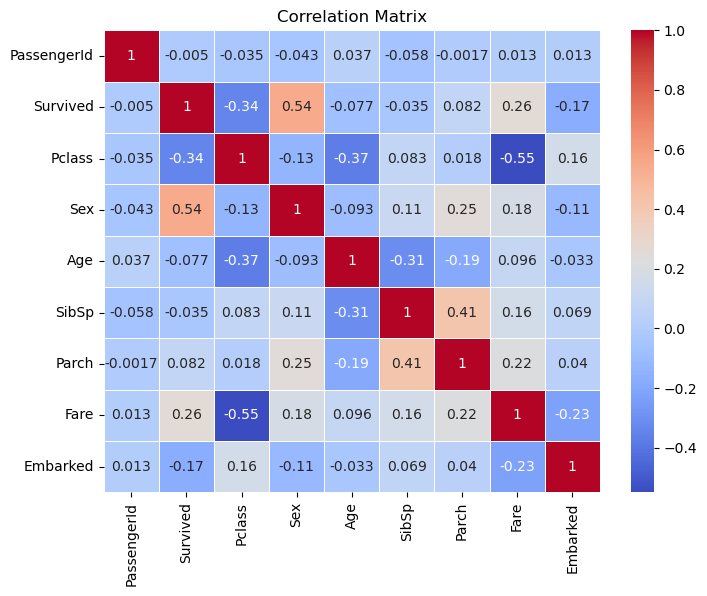

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,3
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,3
4,896,3,1,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,3
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,3
416,1308,3,0,NaN,0,0,8.0500,3


<Axes: xlabel='Age'>

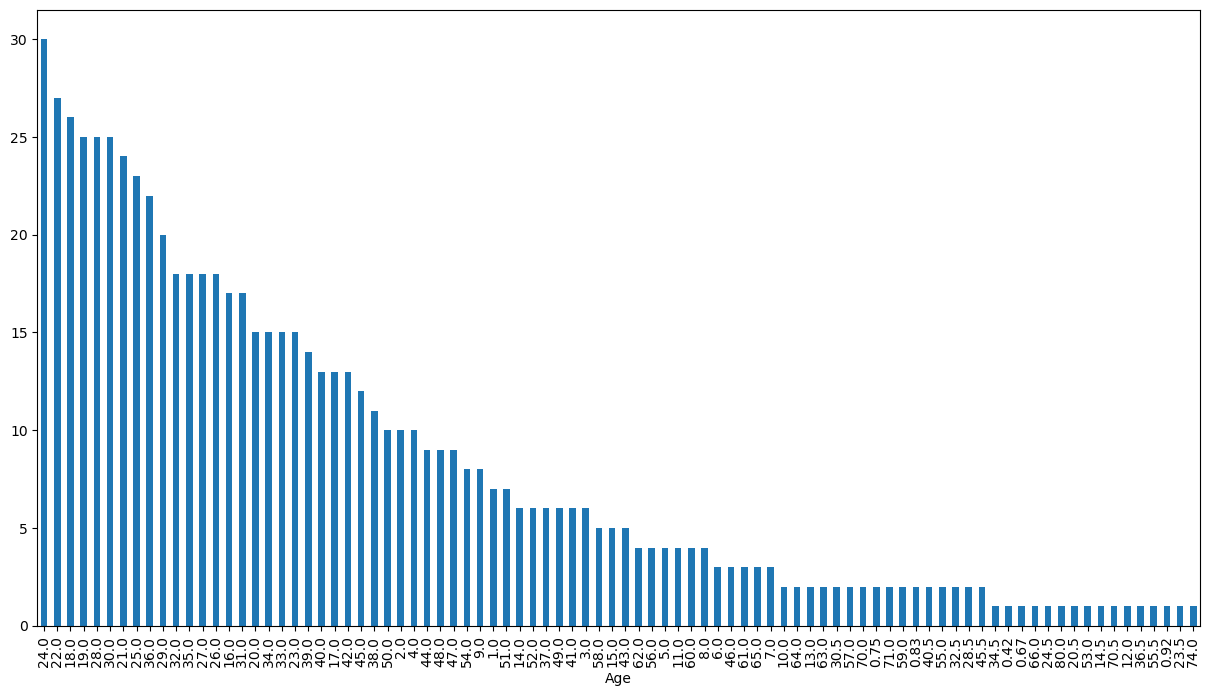

In [12]:
plt.figure(figsize=(15, 8))
df_train["Age"].value_counts().plot(kind = "bar")

In [13]:
df_train[df_train["Age"] <= 18]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,8,0,3,0,2.0,3,1,21.0750,3.0
9,10,1,2,1,14.0,1,0,30.0708,1.0
10,11,1,3,1,4.0,1,1,16.7000,3.0
14,15,0,3,1,14.0,0,0,7.8542,3.0
16,17,0,3,0,2.0,4,1,29.1250,2.0
...,...,...,...,...,...,...,...,...,...
852,853,0,3,1,9.0,1,1,15.2458,1.0
853,854,1,1,1,16.0,0,1,39.4000,3.0
855,856,1,3,1,18.0,0,1,9.3500,3.0
869,870,1,3,0,4.0,1,1,11.1333,3.0


In [14]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())

In [15]:
df_train["Age"].mean()

29.69911764705882

In [16]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

<Axes: xlabel='Age'>

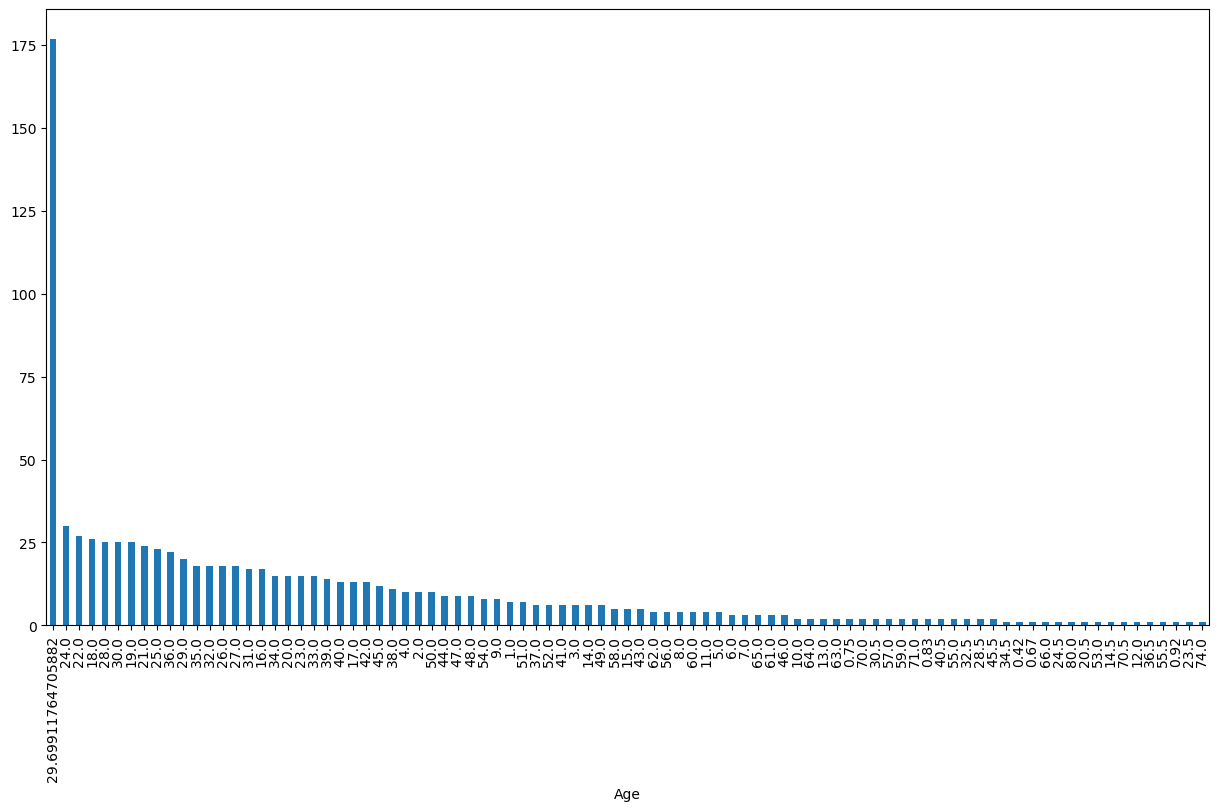

In [17]:
plt.figure(figsize=(15, 8))
df_train["Age"].value_counts().plot(kind = "bar")

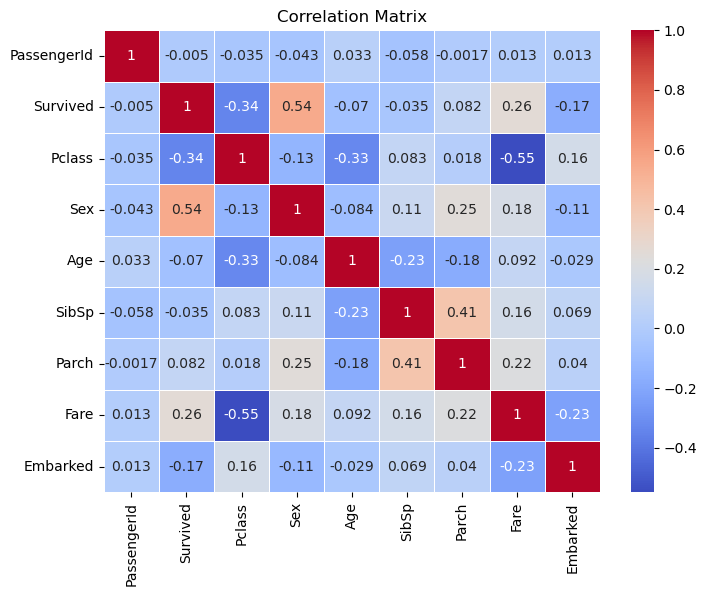

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
df_train[(df_train["Fare"] <= 10 )& (df_train["Survived"]==1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,3,1,3,1,26.000000,0,0,7.9250,3.0
19,20,1,3,1,29.699118,0,0,7.2250,1.0
22,23,1,3,1,15.000000,0,0,8.0292,2.0
28,29,1,3,1,29.699118,0,0,7.8792,2.0
32,33,1,3,1,29.699118,0,0,7.7500,2.0
...,...,...,...,...,...,...,...,...,...
804,805,1,3,0,27.000000,0,0,6.9750,3.0
821,822,1,3,0,27.000000,0,0,8.6625,3.0
828,829,1,3,0,29.699118,0,0,7.7500,2.0
855,856,1,3,1,18.000000,0,1,9.3500,3.0


In [20]:
df_train["FareBand"] = pd.qcut(df_train["Fare"], 4)

df_test["FareBand"] = pd.qcut(df_test["Fare"], 4)

In [21]:
df_train.loc[ df_train['Fare'] <= 7.91, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 7.91) & (df_train['Fare'] <= 14.454), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 31), 'Fare']   = 2
df_train.loc[ df_train['Fare'] > 31, 'Fare'] = 3
df_train['Fare'] = df_train['Fare'].astype(int)

df_train = df_train.drop(['FareBand'], axis=1)

df_test.loc[ df_test['Fare'] <= 7.91, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 7.91) & (df_test['Fare'] <= 14.454), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 14.454) & (df_test['Fare'] <= 31), 'Fare']   = 2
df_test.loc[ df_test['Fare'] > 31, 'Fare'] = 3
df_test['Fare'] = df_test['Fare'].astype(int)

df_test = df_test.drop(['FareBand'], axis=1)

<Axes: ylabel='Frequency'>

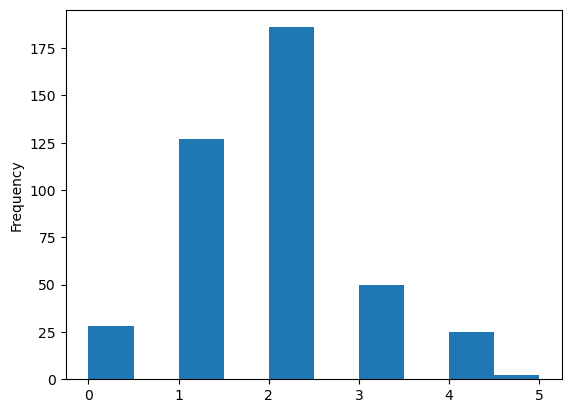

In [29]:
df_test["Age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

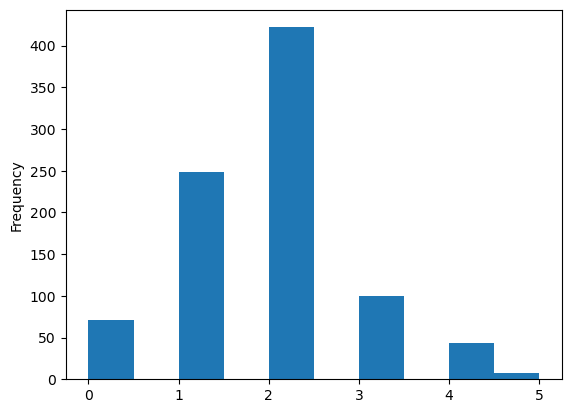

In [30]:
df_train["Age"].plot(kind = "hist")

In [23]:
df_train["AgeBand"] = pd.cut(df_train["Age"], 6)
df_test["AgeBand"] = pd.cut(df_test["Age"], 6)

In [24]:
df_train["AgeBand"].unique()

[(13.683, 26.947], (26.947, 40.21], (53.473, 66.737], (0.34, 13.683], (40.21, 53.473], (66.737, 80.0]]
Categories (6, interval[float64, right]): [(0.34, 13.683] < (13.683, 26.947] < (26.947, 40.21] < (40.21, 53.473] < (53.473, 66.737] < (66.737, 80.0]]

In [25]:
df_train.loc[ df_train['Age'] <= 13.683, 'Age'] = 0
df_train.loc[(df_train['Age'] > 13.683) & (df_train['Age'] <= 26.947), 'Age'] = 1
df_train.loc[(df_train['Age'] > 26.947) & (df_train['Age'] <= 40.21), 'Age']   = 2
df_train.loc[(df_train['Age'] > 40.21) & (df_train['Age'] <= 53.473), 'Age']   = 3
df_train.loc[(df_train['Age'] > 53.473) & (df_train['Age'] <= 66.737), 'Age']   = 4
df_train.loc[ df_train['Age'] > 66.737, 'Age'] = 5
df_train['Age'] = df_train['Age'].astype(int)

df_train = df_train.drop(['AgeBand'], axis=1)

df_test.loc[ df_test['Age'] <= 13.683, 'Age'] = 0
df_test.loc[(df_test['Age'] > 13.683) & (df_test['Age'] <= 26.947), 'Age'] = 1
df_test.loc[(df_test['Age'] > 26.947) & (df_test['Age'] <= 40.21), 'Age']   = 2
df_test.loc[(df_test['Age'] > 40.21) & (df_test['Age'] <= 53.473), 'Age']   = 3
df_test.loc[(df_test['Age'] > 53.473) & (df_test['Age'] <= 66.737), 'Age']   = 4
df_test.loc[ df_test['Age'] > 66.737, 'Age'] = 5
df_test['Age'] = df_test['Age'].astype(int)

df_test = df_test.drop(['AgeBand'], axis=1)

In [31]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [32]:
df_train = df_train[df_train["Embarked"].notna()]

In [37]:
from sklearn.preprocessing import StandardScaler

X_train = df_train.drop("Survived", axis = 1)
y_train = df_train["Survived"]
X_test = df_test

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(type(y_train.values))

<class 'numpy.ndarray'>


In [41]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train.values)
y_pred = tree_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [43]:
submission_df = pd.DataFrame({
    'PassengerId': range(892,1310),
    'Survived': y_pred
})

submission_df.to_csv("submission.csv", index=False)

In [44]:
#kaggle public score is 0.746, so a 74% accuracy with a fairly easy and intuitiv approach